In [2]:
import pickle

In [3]:
with open('./../PickleFiles/xgboost_results.pkl','r') as pickleFile:
    result = pickle.load(pickleFile)

In [4]:
result['Primary Rough'].keys()

['with_year-course',
 'with_course',
 'with_round-year-course',
 'with_hole-course',
 'simplest',
 'with_hole-year-course']

In [19]:
keys = ['simplest','with_course','with_year-course','with_hole-course','with_round-year-course','with_hole-year-course']

In [104]:
[1/result['Bunker'][key]['max_val'] for key in keys]

[0.37096907245123878,
 0.3679263101265754,
 0.36809595106920728,
 0.36720687859943302,
 0.3677817832703355,
 0.36731354207095551]

In [102]:
[1/result['Green'][key]['max_val'] for key in keys]

[0.11531302578216522,
 0.11514849612986736,
 0.11511624570402854,
 0.11511462515518511,
 0.11511116406925656,
 0.11509837736132526]

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

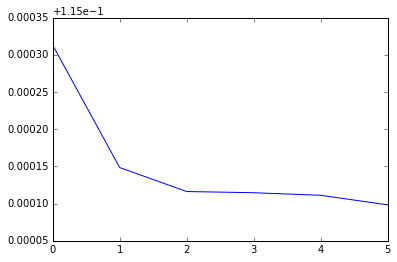

In [43]:
plt.plot(range(6),[1/result['Green'][key]['max_val'] for key in keys]);

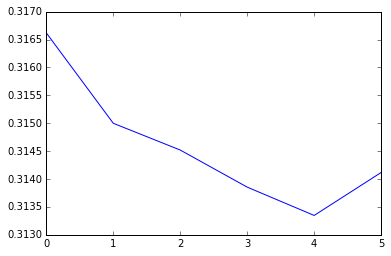

In [44]:
plt.plot(range(6),[1/result['Fairway'][key]['max_val'] for key in keys]);

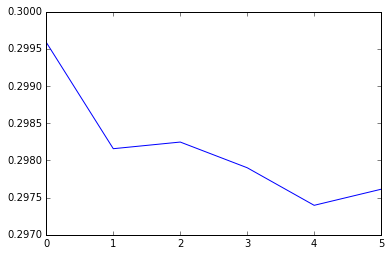

In [54]:
plt.plot(range(6),[1/result['Intermediate Rough'][key]['max_val'] for key in keys]);

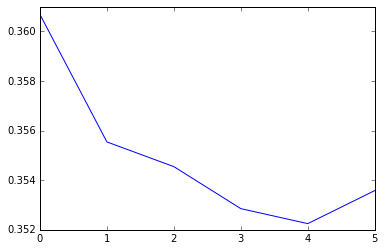

In [78]:
plt.plot(range(6),[1/result['Primary Rough'][key]['max_val'] for key in keys]);

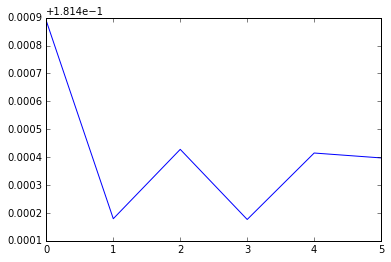

In [91]:
plt.plot(range(6),[1/result['Fringe'][key]['max_val'] for key in keys]);

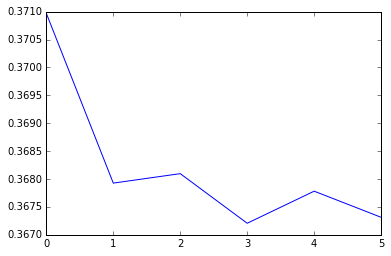

In [95]:
plt.plot(range(6),[1/result['Bunker'][key]['max_val'] for key in keys]);

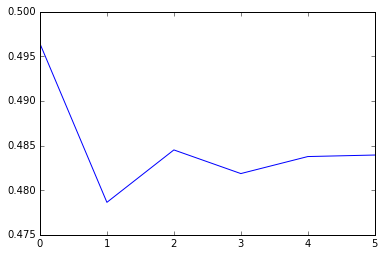

In [21]:
plt.plot(range(6),[1/result['Other'][key]['max_val'] for key in keys]);

In [99]:
result['Green']['with_hole-course']

{'max_params': {'alpha': 0.21444047587899487,
  'gamma': 0.34645461676340439,
  'lamb': 2.8223093863894171,
  'max_depth': 4.0190915483554557,
  'min_child_weight': 5.1439846853882338,
  'subsample': 0.95414464917288377},
 'max_val': 8.6869934958473607}

In [8]:
1/8.61

0.11614401858304298

In [9]:
complexity_choice = {'Green':2,'Fairway':4,'Intermediate Rough':4,'Primary Rough':4,'Fringe':1,'Bunker':3,'Other':1}

In [16]:
cats = ['Green','Fairway','Intermediate Rough','Primary Rough','Fringe','Bunker','Other']

In [27]:
keys

['simplest',
 'with_course',
 'with_year-course',
 'with_hole-course',
 'with_round-year-course',
 'with_hole-year-course']

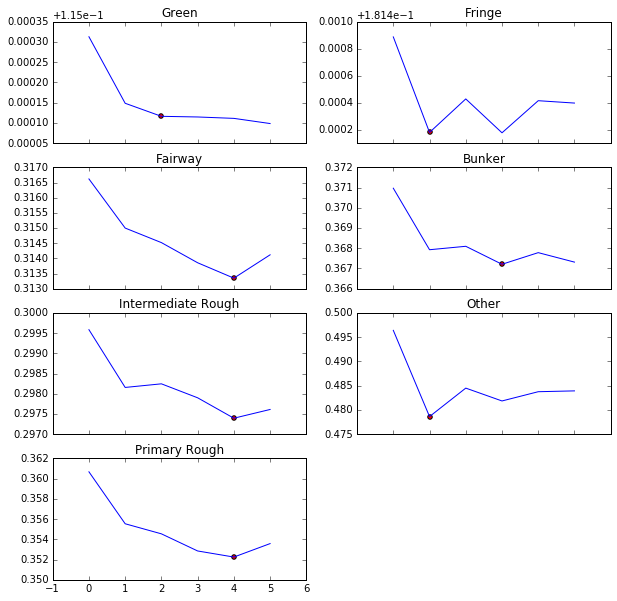

In [32]:
fig, axes = plt.subplots(figsize=(10,10),nrows=4, ncols=2, sharex=True, sharey=False)
for u,cat in enumerate(cats):
    axes[u%4,u/4].plot(range(6),[1/result[cat][key]['max_val'] for key in keys]);
    axes[u%4,u/4].scatter(complexity_choice[cat],1/result[cat][keys[complexity_choice[cat]]]['max_val'],c='red')
    axes[u%4,u/4].set_title(cat)
fig.delaxes(axes[3,1])
plt.savefig